            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
Month
1950-01-01    14.574495
1950-02-01    35.214646
1950-03-01    14.536616
1950-04-01    13.347222
1950-05-01    -0.391414
1950-06-01   -16.478535
1950-07-01   -35.758838
1950-08-01   -33.789141
1950-09-01     7.521465
1950-10-01    21.271465
1950-11-01    39.104798
1950-12-01    35.680556
1951-01-01    30.449495
1951-02-01    43.297980
1951-03-01    33.786616
1951-04-01    21.513889
1951-05-01    24.066919
1951-06-01   -12.436869
1951-07-01   -32.633838
1951-08-01   -31.247475
1951-09-01     6.604798
1951-10-01    22.563131
1951-11-01    41.854798
1951-12-01    31.347222
1952-01-01    26.116162
1952-02-01    42.881313
1952-03-01    19.036616
1952-04-01    11.097222
1952-05-01     8.566919
1952-06-01     2.104798
                ...    
1958-07-01    41.241162
1958-08-01    56.377525
1958-09-01     8.938131
1958-10-01     3.

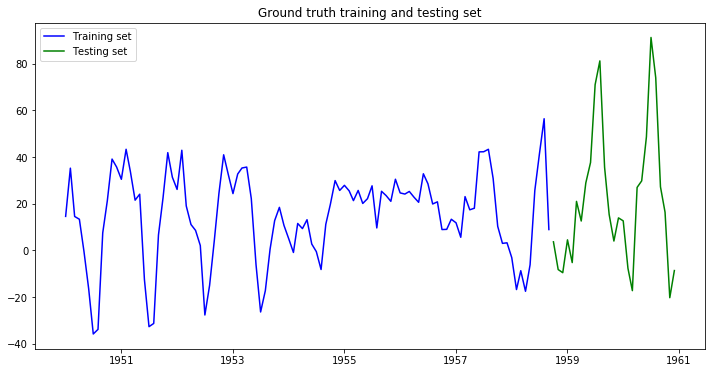

/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`

MSE forecast:			468.5451
MSE predict:			468.5451
MSE forecast:			529.5507
MSE predict:			1326.5889
MSE forecast:			507.1724
MSE predict:			507.1724


/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


MSE forecast:			524.6992
MSE predict:			1234.5122
MSE forecast:			525.0778
MSE predict:			1254.6765
MSE forecast:			435.2372
MSE predict:			435.2372
MSE forecast:			542.5214
MSE predict:			1301.9639


In [34]:
# -*- coding: utf-8 -*-
"""
Created on Fri Feb 12 19:17:33 2018
@author: noteven2degrees
"""

import pandas as pd
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# figure parameters
rcParams['figure.figsize'] = 12, 6

# read data
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('./data/AirPassengers.csv', parse_dates=['Month'], index_col=['Month'],date_parser=dateparse)
print(data.head())
ts = data['Passengers']

# decompose time series (optional)
decomposition = seasonal_decompose(ts, two_sided=False)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
residual.dropna(inplace=True)

print(decomposition.resid)

# create training and test set
size = int(len(residual) * 0.8)
train, test = residual[0:size], residual[size:len(residual)]
plt.plot(train.index, train, color='blue', label='Training set')
plt.plot(test.index, test, color='green', label='Testing set')
plt.legend()
plt.title('Ground truth training and testing set')
plt.show()


# assess quality of ARIMA models
# for iterative one-step forecasting on test data set
def compare_ARIMA_modes_testing(order):
    history = [x for x in train]
    predictions_f = list()
    predictions_p = list()
    for t in range(len(test)):
        model = ARIMA(history, order=order)
        model_fit = model.fit(disp=-1)
        yhat_f = model_fit.forecast()[0][0]
        yhat_p = model_fit.predict(start=len(history), end=len(history))[0]
        predictions_f.append(yhat_f)
        predictions_p.append(yhat_p)
        history.append(test[t])
    error_f = mean_squared_error(test, predictions_f)
    error_p = mean_squared_error(test, predictions_p)
    print('MSE forecast:\t\t\t{:1.4f}'.format(error_f))
    print('MSE predict:\t\t\t{:1.4f}'.format(error_p))
    return {'Predictions forecast': predictions_f,
            'Predictions predict': predictions_p,
            'MSE forecast': error_f,
            'MSE predict': error_p}

ar_testing = compare_ARIMA_modes_testing((1, 0, 0))
ma_testing = compare_ARIMA_modes_testing((0, 1, 0))
ig_testing = compare_ARIMA_modes_testing((0, 0, 1))
arma_testing = compare_ARIMA_modes_testing((1, 1, 0))
igma_testing = compare_ARIMA_modes_testing((0, 1, 1))
arig_testing = compare_ARIMA_modes_testing((1, 0, 1))
arima_testing = compare_ARIMA_modes_testing((1, 1, 1))



In [11]:
# # forecast and predict are identical for AR
# plt.plot(test, label='Ground Truth')
# plt.plot(ar_testing['Predictions forecast'], color='red', label='.forecast()')
# plt.plot(ar_testing['Predictions predict'], color='green', label='.predict()')
# plt.legend()
# plt.title('AR')
# plt.show()
ar_testing['Predictions predict']

[10.63645400100371,
 6.835879778466698,
 -1.8354951937731618,
 -2.9690583181475825,
 7.2550446445610905,
 0.12792858537597196,
 19.04887882567529,
 13.049151900590001,
 24.701065244594282,
 31.0954582861179,
 56.32206613636612,
 65.99348717045726,
 30.173314786725626,
 15.451558919566434,
 7.2350229587295996,
 14.394591114701072,
 13.47001269414995,
 -1.2600863281700665,
 -8.467356732841102,
 23.526259739359975,
 25.561607023142805,
 39.21255959243796,
 72.14360262723486,
 59.51802594164649,
 24.266431286836017,
 16.45114820237476,
 -9.866738295505774]

In [ ]:
# forecast and predict are different for MA
plt.plot(test, label='Ground Truth')
plt.plot(arma_testing['Predictions forecast'], color='red', label='.forecast()')
plt.plot(arma_testing['Predictions predict'], color='green', label='.predict()')
plt.legend()
plt.title('ARMA')
plt.show()


# compare forecasting results of ARIMA models
# for iterative forecasting
def compare_ARIMA_modes(order):
    history_f = [x for x in train]
    history_p = [x for x in train]
    predictions_f = list()
    predictions_p = list()
    for t in range(len(test)):
        model_f = ARIMA(history_f, order=order)
        model_p = ARIMA(history_p, order=order)
        model_fit_f = model_f.fit(disp=-1)
        model_fit_p = model_p.fit(disp=-1)
        yhat_f = model_fit_f.forecast()[0][0]
        yhat_p = model_fit_p.predict(start=len(history_p), end=len(history_p))[0]
        predictions_f.append(yhat_f)
        predictions_p.append(yhat_p)
        history_f.append(yhat_f)
        history_f.append(yhat_p)
    error_f = mean_squared_error(test, predictions_f)
    error_p = mean_squared_error(test, predictions_p)
    print('MSE forecast:\t\t\t{:1.4f}'.format(error_f))
    print('MSE predict:\t\t\t{:1.4f}'.format(error_p))
    return {'Predictions forecast': predictions_f,
            'Predictions predict': predictions_p,
            'MSE forecast': error_f,
            'MSE predict': error_p}

ar = compare_ARIMA_modes((1, 0, 0))
ma = compare_ARIMA_modes((0, 1, 0))
ig = compare_ARIMA_modes((0, 0, 1))
arma = compare_ARIMA_modes((1, 1, 0))
igma = compare_ARIMA_modes((0, 1, 1))
arig = compare_ARIMA_modes((1, 0, 1))
arima = compare_ARIMA_modes((1, 1, 1))

# forecast and predict are different for AR
plt.plot(test, label='Ground Truth')
plt.plot(ar['Predictions forecast'], color='red', label='.forecast()')
plt.plot(ar['Predictions predict'], color='green', label='.predict()')
plt.legend()
plt.title('AR')
plt.show()

# forecast and predict are different for ARMA
plt.plot(test, label='Ground Truth')
plt.plot(arma['Predictions forecast'], color='red', label='.forecast()')
plt.plot(arma['Predictions predict'], color='green', label='.predict()')
plt.legend()
plt.title('ARMA')
plt.show()



# compare forecasting results of ARIMA models
# using the step parameter
def compare_ARIMA_modes_steps(order):
    history = [x for x in train]
    model = ARIMA(history, order=order)
    model_fit = model.fit(disp=-1)
    predictions_f_ms = model_fit.forecast(steps=len(test))[0]
    predictions_p_ms = model_fit.predict(start=len(history), end=len(history)+len(test)-1)
    error_f_ms = mean_squared_error(test, predictions_f_ms)
    error_p_ms = mean_squared_error(test, predictions_p_ms)
    print('MSE forecast:\t\t\t{:1.4f}'.format(error_f_ms))
    print('MSE predict:\t\t\t{:1.4f}'.format(error_p_ms))
    return {'Predictions forecast': predictions_f_ms,
            'Predictions predict': predictions_p_ms,
            'MSE forecast': error_f_ms,
            'MSE predict': error_p_ms}

ar_steps = compare_ARIMA_modes_steps((1, 0, 0))
ma_steps = compare_ARIMA_modes_steps((0, 1, 0))
ig_steps = compare_ARIMA_modes_steps((0, 0, 1))
arma_steps = compare_ARIMA_modes_steps((1, 1, 0))
igma_steps = compare_ARIMA_modes_steps((0, 1, 1))
arig_steps = compare_ARIMA_modes_steps((1, 0, 1))
arima_steps = compare_ARIMA_modes_steps((1, 1, 1))

# forecast and predict are identical for AR
plt.plot(test, label='Ground Truth')
plt.plot(ar_steps['Predictions forecast'], color='red', label='.forecast(steps)')
plt.plot(ar_steps['Predictions predict'], color='green', label='.predict(steps)')
plt.legend()
plt.title('AR')
plt.show()

# forecast and predict are different for ARMA
plt.plot(test, label='Ground Truth')
plt.plot(arma_steps['Predictions forecast'],  color='red', label='.forecast(steps)')
plt.plot(arma_steps['Predictions predict'], color='green', label='.predict(steps)')
plt.legend()
plt.title('ARMA')
plt.show()




In [32]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
print(series.head())

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]

test.shape

Month
1-01    266.0
1-02    145.9
1-03    183.1
1-04    119.3
1-05    180.3
Name: Sales of shampoo over a three year period, dtype: float64


(13,)